### 서울시 구별 CCTV 현황 분석하기
- 서울시 각 구별 CCTV 수를 파악해보자
- 인구대비 CCTV비율을 파악해서 순위를 예측해보자
- 인구대비 CCTV의 예측치를 확인하고, CCTV가 부족한 구를 확인해보자

In [1]:
#데이터 분석 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')

### CSV 파일 읽기 - 서울시 구별 CCTV 현황

In [2]:
cctv_seoul=pd.read_csv('./CCTV_in_Seoul.csv',encoding="utf-8")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


#### 컬럼명 변경

In [3]:
#'기관명' 컬럼명을 '구별'로 변경
# rename 메소드 활용 rename(columns={변경전:변경후})
cctv_seoul.rename(columns={'기관명':'구별'},inplace=True)

#### 엑셀 파일 읽기 - 서울 시 인구 현황

In [4]:
#pip install xlrd

In [5]:
pop_seoul=pd.read_excel('./population_in_Seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


### columns에 문제가 있기 때문에 옵션 설정
- header : 읽고 싶은 row index(0부터 시작)
- usecols : 읽고 싶은 column 선택

In [6]:
pop_seoul=pd.read_excel('./population_in_Seoul.xls', 
              header=2,
             usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### column명 바꾸기

In [7]:
#'자치구' = '구별',계=인구수,계1=한국인,계2=외국인,65세이상고령자=고령자
pop_seoul.columns=['구별','인구수','한국인','외국인','고령자']

In [8]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### CCTV 데이처 파악하기
- CCTV가 가장 부족한 구를 확인해보자

In [9]:
cctv_seoul.sort_values(by='소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


### 최근 3년 동안 CCTV가 가장 많이 설치된 지역을 알아보자

In [10]:
#최근 3년 증가율 = (2016+2015+2014) / 2013년도 이전 * 100
#최근 3년 증가율 값을 구하고 최근 3년 증가율이라는 컬럼 생성
cctv_seoul['최근3년증가율']=(cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전']*100

In [11]:
cctv_seoul.sort_values(by='최근3년증가율').tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근3년증가율
1,강동구,773,379,99,155,377,166.490765
8,노원구,1265,542,57,451,516,188.929889
12,마포구,574,314,118,169,379,212.101911
9,도봉구,485,238,159,42,386,246.638655
22,종로구,1002,464,314,211,630,248.922414


In [12]:
cctv_seoul.max()

구별                  중랑구
소계                 2780
2013년도 이전          1843
2014년               430
2015년               584
2016년               932
최근3년증가율      248.922414
dtype: object

### 서울시 인구 데이터 파악하기

In [13]:
#합계 행 삭제하기
#drop 합계 행 삭제하기
pop_seoul.drop(0, inplace=True)

In [14]:
pop_seoul=pop_seoul.reset_index(drop=True)

In [15]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0


In [16]:
#결측치 제거하기

#1) 구별이 nan인 인덱스 값 변수에 담기
del_index=pop_seoul[pop_seoul['구별'].isnull()].index
#2) 결측치 제거하기
pop_seoul.drop(del_index, inplace=True)

In [17]:
pop_seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0


In [18]:
#인구수 대비 외국인 비율, 고령자 비율이 높은 구를 확인하자
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수'] * 100

In [19]:
#외국인비율 내림차순 정렬
pop_seoul.sort_values(by=['외국인비율'],ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
18,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
16,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506


In [20]:
#고령자비율 내림차순 정렬
pop_seoul.sort_values(by=['고령자비율'],ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
8,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


### CCTV 데이터와 인구 데이터 합치고 분석하기
- 구별 컬럼을 기준으로 병합

In [21]:
pop_seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [22]:
cctv_seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근3년증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252


In [23]:
data_result=pd.merge(cctv_seoul,pop_seoul,on='구별')
data_result.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근3년증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [24]:
# data_resault에서 2013년도 이전,2014년,2015년,2016년 컬럼 삭제
#del 키워드 활용
#del 변수명['삭제하고 싶은 컬럼명']

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']


In [25]:
#'구별' 컬럼을 인덱스로 설정
data_result=data_result.set_index('구별')

In [26]:
data_result.head(3)

,소계,최근3년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


### 인구수 대비 cctv 설치 수가 많은/적은 지역을 확인해보자

In [27]:
# 1. 인구수대비 cctv수 라는 컬럼 생성
#소계/인구수 * 100
data_result['인구수대비 CCTV수']=data_result['소계']/data_result['인구수']*100

In [28]:
data_result.head()

,소계,최근3년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수대비 CCTV수
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


In [29]:
# 2. 정렬을 이용해서 많은 지역 / 적은 지역 확인하기
data_result.sort_values(by='인구수대비 CCTV수').head()

,소계,최근3년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구수대비 CCTV수
구별,,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312
중랑구,660,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.159227


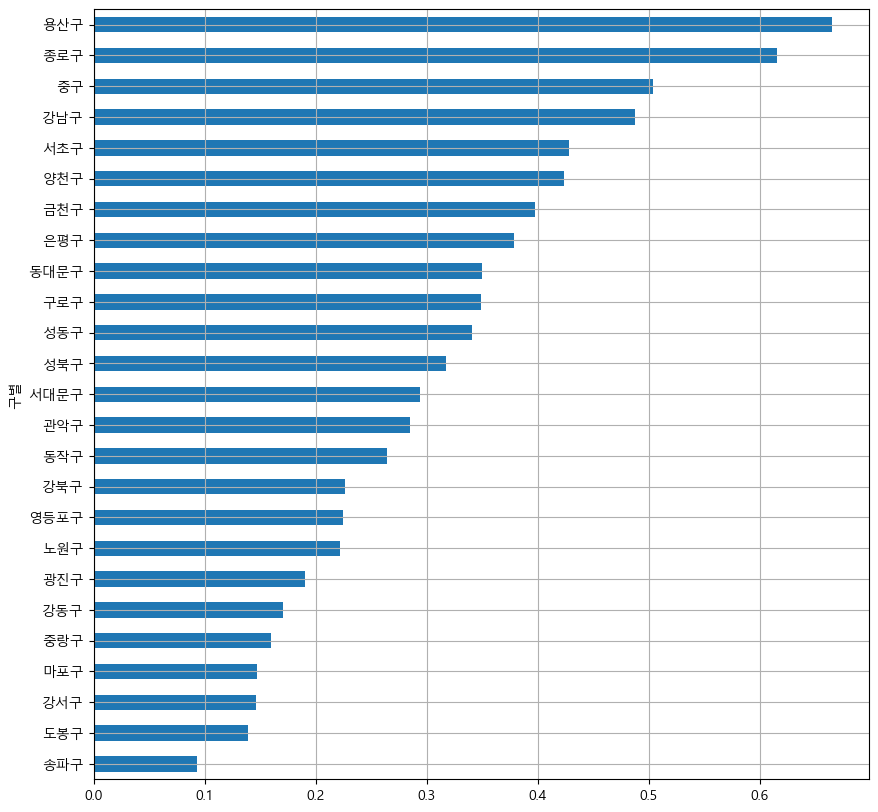

In [30]:
#그래프 시각화하기
data_result['인구수대비 CCTV수'].sort_values().plot(kind='barh', #그래프 종류
                                                    grid=True,
                                                    figsize=(10,10)) #그래프 크기
plt.show()